In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

from kmer_model import KmerLinearRegressor

In [2]:
data = pd.read_csv("../../regression_multiple/UTR5_zscores_replicateagg.csv")
data

,seq,cell_type,fold,1,2,3,4,mass_center,mass_center_mean,diff,zscore,mass_center_std
0,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c1,train,52.125480,52.593756,49.272745,47.834227,2.459879,2.368279,0.091601,0.779921,0.117449
1,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c17,train,46.974545,51.103420,46.791818,34.483872,2.383516,2.368279,0.015238,0.129738,0.117449
2,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c2,train,50.231043,56.194372,60.956634,48.531620,2.499222,2.368279,0.130943,1.114897,0.117449
3,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c4,train,72.587265,56.853170,47.180959,36.766505,2.225536,2.368279,-0.142742,-1.215358,0.117449
4,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c6,train,63.071485,42.937131,41.591609,35.795388,2.273239,2.368279,-0.095039,-0.809197,0.117449
...,...,...,...,...,...,...,...,...,...,...,...,...
108040,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c1,train,24.176383,24.721123,32.529211,32.751569,2.646848,2.598530,0.048317,1.156046,0.041795
108041,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c17,train,43.297184,67.070795,58.874796,63.473836,2.612441,2.598530,0.013911,0.332836,0.041795
108042,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c2,train,27.537770,22.539731,29.272644,30.646646,2.573000,2.598530,-0.025530,-0.610841,0.041795
108043,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c4,train,31.382535,28.750843,30.414356,34.204236,2.540595,2.598530,-0.057935,-1.386167,0.041795


In [3]:
predict_col = "mass_center_mean"

In [4]:
data_unique = data[["seq", "fold", predict_col]].drop_duplicates()

In [5]:
train = data_unique[data_unique["fold"] == "train"]
test = data_unique[data_unique["fold"] == "test"]

## Regressing `k=3`

In [6]:
regressor = KmerLinearRegressor(complement=False, kmer_length=3,
                                linreg_kws=None)
regressor.fit(train["seq"], train[predict_col])
pred = regressor.predict(test["seq"])

Text(0.1, 0.9, 'r = 0.7032')

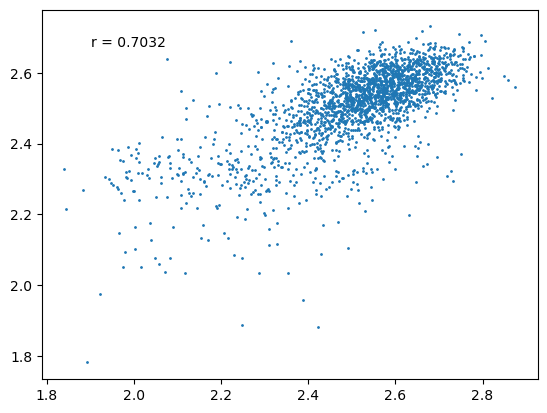

In [7]:
fig, ax = plt.subplots(1, 1)

r = ss.pearsonr(test[predict_col], pred).statistic
ax.scatter(test[predict_col], pred, s=1)
plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)

## Regressing `k=2`

In [8]:
regressor = KmerLinearRegressor(complement=False, kmer_length=2,
                                linreg_kws=None)
regressor.fit(train["seq"], train[predict_col])
pred = regressor.predict(test["seq"])

Text(0.1, 0.9, 'r = 0.4953')

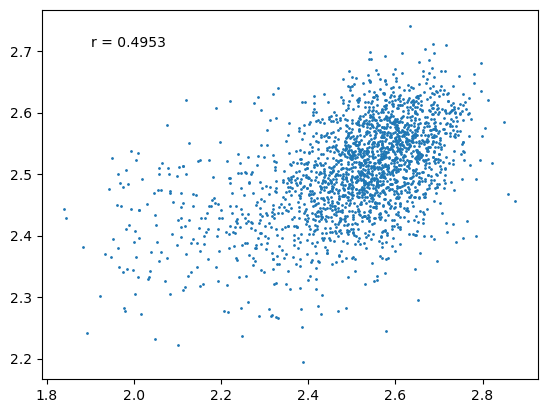

In [9]:
fig, ax = plt.subplots(1, 1)

r = ss.pearsonr(test[predict_col], pred).statistic
ax.scatter(test[predict_col], pred, s=1)
plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)

## Regressing `k=1`

In [10]:
regressor = KmerLinearRegressor(complement=False, kmer_length=1,
                                linreg_kws=None)
regressor.fit(train["seq"], train[predict_col])
pred = regressor.predict(test["seq"])

Text(0.1, 0.9, 'r = 0.1144')

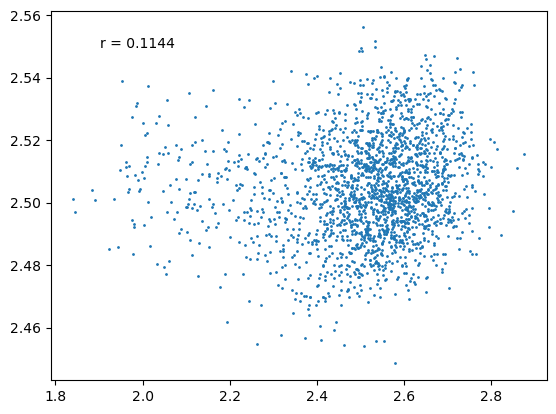

In [11]:
fig, ax = plt.subplots(1, 1)

r = ss.pearsonr(test[predict_col], pred).statistic
ax.scatter(test[predict_col], pred, s=1)
plt.text(0.1, 0.9, f"r = {r:.04f}", transform=ax.transAxes)

In [12]:
regressor.kmer_scores

A   -0.000572
C   -0.001076
G    0.002346
T   -0.000699
dtype: float64